# DiploDatos Kaggle Competition

Presentamos un código creado como ejemplo de base para la competición.

Deben:

- Explorar los datos y aprender de ellos.
- Probar diferentes modelos y ver cuáles ajustan mejor dado los datos.
- **Obtener una accuracy mejor que la que se presenta en este ejemplo.**
- Tratar de obtener la accuracy más alta posible!
- Discutir la elección de modelo.

El análisis exploratorio y el preprocesamiento de los datos queda a libertad de cada grupo y no deben quedarse con este simple ejemplo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder

import xgboost as xgb
from xgboost import XGBClassifier
xgb.set_config(verbosity=0)

In [2]:
df = pd.read_csv('train.csv')
print(df.shape)
print(df.describe())
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy="median")
df[imputer_cols] = imputer.fit_transform(df[imputer_cols])
y = df.Transported
X = df.drop('Transported',axis=1)
X

(7823, 14)
       PassengerId          Age   RoomService     FoodCourt  ShoppingMall  \
count  7823.000000  7661.000000   7669.000000   7668.000000   7635.000000   
mean   4345.691039    28.879389    226.078237    455.643062    172.600393   
std    2504.576803    14.461548    679.180148   1621.290107    597.923749   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%    2182.500000    19.000000      0.000000      0.000000      0.000000   
50%    4345.000000    27.000000      0.000000      0.000000      0.000000   
75%    6515.500000    38.000000     44.000000     69.000000     28.000000   
max    8692.000000    79.000000  14327.000000  29813.000000  23492.000000   

                Spa        VRDeck  Transported  
count   7665.000000   7654.000000  7823.000000  
mean     305.023222    295.476744     0.506711  
std     1133.423579   1093.485752     0.499987  
min        0.000000      0.000000     0.000000  
25%        0.000000      0.000000     0.000000  
5

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend


In [3]:
X.describe()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000,7823.000000
mean,4345.691039,28.840470,221.627764,446.615237,168.452512,298.862713,289.093570
std,2504.576803,14.313512,673.194124,1606.401684,591.285786,1122.738262,1082.461294
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2182.500000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4345.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6515.500000,37.000000,38.500000,56.500000,23.000000,50.000000,40.000000
max,8692.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7823 non-null   int64  
 1   HomePlanet    7644 non-null   object 
 2   CryoSleep     7627 non-null   object 
 3   Cabin         7639 non-null   object 
 4   Destination   7663 non-null   object 
 5   Age           7823 non-null   float64
 6   VIP           7639 non-null   object 
 7   RoomService   7823 non-null   float64
 8   FoodCourt     7823 non-null   float64
 9   ShoppingMall  7823 non-null   float64
 10  Spa           7823 non-null   float64
 11  VRDeck        7823 non-null   float64
 12  Name          7639 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 794.6+ KB


In [5]:
X.isna().sum(), X.shape

(PassengerId       0
 HomePlanet      179
 CryoSleep       196
 Cabin           184
 Destination     160
 Age               0
 VIP             184
 RoomService       0
 FoodCourt         0
 ShoppingMall      0
 Spa               0
 VRDeck            0
 Name            184
 dtype: int64,
 (7823, 13))

## PreProcessing

Cantidad de nulos por feature:

In [6]:
features = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age','VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Name']

def print_null_values(dataset,features):
    row, column = dataset.shape 
    for feature in features:
        values = dataset[feature].count()
        missing_values = dataset[feature].isnull().sum()
        nan_values = dataset[feature].isna().sum()
        perc = (values / row) * 100
        print("{0} {1} {2} {3:.2f}%".format(feature,values,missing_values,perc))
    
print_null_values(X,features)

HomePlanet 7644 179 97.71%
CryoSleep 7627 196 97.49%
Cabin 7639 184 97.65%
Destination 7663 160 97.95%
Age 7823 0 100.00%
VIP 7639 184 97.65%
RoomService 7823 0 100.00%
FoodCourt 7823 0 100.00%
ShoppingMall 7823 0 100.00%
Spa 7823 0 100.00%
VRDeck 7823 0 100.00%
Name 7639 184 97.65%


Iremos viendo una por una las features que tienen datos faltantes, para ver que conviene hacer en cada caso.

In [7]:
X.drop(columns=['Name'], inplace=True)

Generamos una columna "Expenses" que contiene la suma de gastos que realizó cada pasajero. A su vez, generamos una columna con la media de estos gastos y el desvío estandar, solo para generar nuevas features y luego usarlas en el modelo.

In [8]:
X['Expenses'] = X.iloc[:,7:12].sum(axis=1)
X['Expenses_mean'] = X.iloc[:,7:12].mean(axis=1)
X['Expenses_std'] = X.iloc[:,7:12].std(axis=1)
X

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Expenses,Expenses_mean,Expenses_std
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,7941.0,1588.2,2081.228892
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,1554.0,310.8,509.426344
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,705.0,141.0,296.079381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,809.0,161.8,326.532081
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,983.0,196.6,363.273726


In [9]:
X[X.CryoSleep.isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Expenses,Expenses_mean,Expenses_std
42,5486,Earth,NaN,F/1209/P,TRAPPIST-1e,64.0,False,0.0,623.0,1827.0,0.0,0.0,2450.0,490.0,794.600214
99,3747,Earth,NaN,G/660/S,TRAPPIST-1e,45.0,False,1796.0,0.0,4.0,0.0,5.0,1805.0,361.0,802.192620
100,730,Earth,NaN,G/117/S,TRAPPIST-1e,54.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
129,6226,Earth,NaN,F/1260/S,TRAPPIST-1e,18.0,False,289.0,1809.0,3.0,2.0,2.0,2105.0,421.0,785.782094
137,1756,Earth,NaN,G/292/S,TRAPPIST-1e,25.0,False,0.0,60.0,0.0,646.0,1115.0,1821.0,364.2,500.233146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7665,2440,Earth,NaN,F/541/P,TRAPPIST-1e,17.0,False,0.0,604.0,0.0,0.0,218.0,822.0,164.4,263.250451
7689,6969,Mars,NaN,E/479/P,55 Cancri e,20.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7714,5563,Europa,NaN,B/201/P,55 Cancri e,49.0,False,0.0,1264.0,0.0,5474.0,104.0,6842.0,1368.4,2356.405907
7737,1770,Europa,NaN,C/71/S,55 Cancri e,18.0,False,0.0,16263.0,72.0,0.0,15.0,16350.0,3270.0,7263.368330


In [10]:
X[X.CryoSleep == True].Expenses.value_counts()

0.0    2756
Name: Expenses, dtype: int64

Como vemos, unicamente los que tienen el valor True en CryoSleep han gastado dinero, por lo tanto podemos utilizar esta assumption para completar los valores faltantes de esta columna.

In [11]:
X.CryoSleep.fillna('Unknown', inplace=True)

In [12]:
def fill_cryo(x, y):
    if x == 'Unknown' and y == 0:
        return True
    elif x == 'Unknown' and y != 0:
        return False
    else:
        return x
X['CryoSleep'] = X[['CryoSleep','Expenses']].apply(
    lambda row: fill_cryo(row['CryoSleep'], row['Expenses']) , axis=1)

Luego pasamos la columna a booleano.

In [13]:
X['CryoSleep'] = X['CryoSleep'].astype('bool')
X

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Expenses,Expenses_mean,Expenses_std
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,7941.0,1588.2,2081.228892
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,1554.0,310.8,509.426344
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,705.0,141.0,296.079381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,809.0,161.8,326.532081
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,983.0,196.6,363.273726


Vamos a utilizar la columna CryoSleep para llenar los valores faltantes de RoomService, FoodCourt, ShoppingMall, Spa y VRDeck.

In [14]:
RoomService_mean = X.loc[X.CryoSleep == 0].RoomService.mean()
FoodCourt_mean = X.loc[X.CryoSleep == 0].FoodCourt.mean()
ShoppingMall_mean = X.loc[X.CryoSleep == 0].ShoppingMall.mean()
Spa_mean = X.loc[X.CryoSleep == 0].Spa.mean()
VRDeck_mean = X.loc[X.CryoSleep == 0].VRDeck.mean()

In [15]:
X.iloc[:,7:12] = X.iloc[:,7:12].fillna("Unknown")
def fill_in (x,y,mean):
    if x == True and y == 'Unknown':
        return 0
    elif x == False and y == 'Unknown':
        return mean
    else:
        return y
X['RoomService'] = X[['CryoSleep','RoomService']].apply(
    lambda row: fill_in(row['CryoSleep'], row['RoomService'],RoomService_mean),axis=1)  
X['FoodCourt'] = X[['CryoSleep','FoodCourt']].apply(
   lambda row: fill_in(row['CryoSleep'], row['FoodCourt'],FoodCourt_mean),axis=1)
X['ShoppingMall'] = X[['CryoSleep','ShoppingMall']].apply(
    lambda row: fill_in(row['CryoSleep'], row['ShoppingMall'],ShoppingMall_mean),axis=1)  
X['Spa'] = X[['CryoSleep','Spa']].apply(
    lambda row: fill_in(row['CryoSleep'], row['Spa'],Spa_mean),axis=1)  
X['VRDeck'] = X[['CryoSleep','VRDeck']].apply(
    lambda row: fill_in(row['CryoSleep'], row['VRDeck'],VRDeck_mean),axis=1)

Generamos una funcion para imputar las filas con datos faltantes en "Age", usando como dato el planeta de origen y la moda de la gente que viene de ese planeta. Luego lo aplicamos al dataframe para imputar estos datos.

In [16]:
all_data_age = X.dropna(subset=['Age']).copy()
grouped_ages = all_data_age[['HomePlanet', 'Age']].groupby(['HomePlanet']).agg(pd.Series.mode)
median_ages = all_data_age['Age'].mode()

def impute_age(dataset):
    for index, row in dataset.iterrows():
        home = row['HomePlanet']
        age = row['Age']
        if pd.isna(age):
            try:
                age = grouped_ages[home]
            except:
                age = median_ages
                
            dataset.at[index,'Age'] = age
        

In [17]:
impute_age(X)

Generamos una columna nueva llamada "AgeBand", que contiene el rango de edad de todos los pasajeros.

In [18]:
def age_band(dataset, bins = 5):
    labels = range(bins)
    return pd.cut(dataset['Age'], bins=bins, labels=labels)

X['AgeBand'] = age_band(X,6).astype('int')

In [19]:
X.VIP = X.VIP.fillna(False)

Creamos una función para hacer un split en la columna "Cabin" y asi obtener features adicionales.

In [20]:
def split_deck(df):
    subset = df['Cabin'].str.split('/', expand=True)
    subset.rename(columns={0: "Deck", 1: "Num",2:"Side"},inplace=True)
    return pd.concat([df, subset], axis = 1)

X = split_deck(X)
X = X.drop(['Cabin'], axis=1)

In [21]:
X.HomePlanet.value_counts()

Earth     4114
Europa    1935
Mars      1595
Name: HomePlanet, dtype: int64

In [22]:
X[X.HomePlanet == 'Earth'].Destination.value_counts()

TRAPPIST-1e      2774
PSO J318.5-22     642
55 Cancri e       614
Name: Destination, dtype: int64

In [23]:
knn_nan = ['Num']

In [24]:
from sklearn.impute import KNNImputer

knn_impute = KNNImputer(n_neighbors=5)
knn_impute.fit(X[knn_nan])
X[knn_nan] = pd.DataFrame(knn_impute.transform(X[knn_nan]).round(), columns = knn_nan)

In [25]:
si_nan = ['Side', 'Deck', 'HomePlanet', 'Destination']
si = SimpleImputer(strategy='most_frequent')
si.fit(X[si_nan])
X[si_nan] = pd.DataFrame(si.transform(X[si_nan]), columns = si_nan)

Una vez que completamos los valores faltantes en estas columnas, aplicamos un encoding para que sean interpretadas de forma categórica.

In [26]:
ordinal_encoder = OrdinalEncoder()
object_cols = ['Side','Deck','HomePlanet','Destination']
X[object_cols] = ordinal_encoder.fit_transform(X[object_cols])
X

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Expenses,Expenses_mean,Expenses_std,AgeBand,Deck,Num,Side
0,3430,1.0,False,2.0,57.0,False,0.0,3859.0,13.0,195.0,3874.0,7941.0,1588.2,2081.228892,4,2.0,123.0,0.0
1,669,2.0,True,2.0,18.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,5.0,126.0,1.0
2,8430,1.0,True,2.0,33.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2,1.0,343.0,1.0
3,6463,0.0,False,2.0,43.0,False,142.0,1208.0,0.0,0.0,204.0,1554.0,310.8,509.426344,3,5.0,1420.0,0.0
4,85,0.0,False,2.0,19.0,False,0.0,0.0,670.0,1.0,34.0,705.0,141.0,296.079381,1,6.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,2.0,False,2.0,12.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,5.0,1319.0,1.0
7819,2693,0.0,False,2.0,44.0,False,0.0,0.0,744.0,62.0,3.0,809.0,161.8,326.532081,3,6.0,459.0,1.0
7820,8076,2.0,True,2.0,55.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4,5.0,1772.0,0.0
7821,3829,0.0,False,2.0,15.0,False,0.0,840.0,123.0,0.0,20.0,983.0,196.6,363.273726,1,4.0,253.0,0.0


<AxesSubplot:>

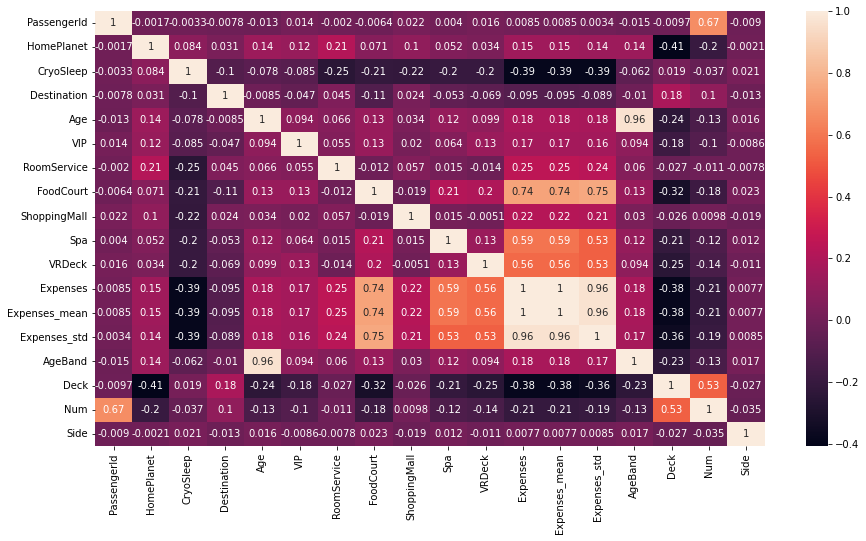

In [27]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(X.corr(),annot = True,)

In [28]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [29]:
X['Age'] = mms.fit_transform(X["Age"].values.reshape(-1, 1))
X['Expenses'] = mms.fit_transform(X["Expenses"].values.reshape(-1, 1))
X['Expenses_mean'] = mms.fit_transform(X["Expenses_mean"].values.reshape(-1, 1))
X['Expenses_std'] = mms.fit_transform(X["Expenses_std"].values.reshape(-1, 1))
X["VIP"] = X["VIP"].astype(int)
X["HomePlanet"] = X["HomePlanet"].astype(int)
X["Destination"] = X["Destination"].astype(int)
X["CryoSleep"] = X["CryoSleep"].astype(int)
X["Deck"] = X["Deck"].astype(int)
X["Side"] = X["Side"].astype(int)
X["Num"] = X["Num"].astype(int)
X['RoomService'] = mms.fit_transform(X["RoomService"].values.reshape(-1, 1))
X['FoodCourt'] = mms.fit_transform(X["FoodCourt"].values.reshape(-1, 1))
X['ShoppingMall'] = mms.fit_transform(X["ShoppingMall"].values.reshape(-1, 1))
X['Spa'] = mms.fit_transform(X["Spa"].values.reshape(-1, 1))
X['VRDeck'] = mms.fit_transform(X["VRDeck"].values.reshape(-1, 1))

In [30]:
feature_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenses',
       'AgeBand', 'Deck', 'Side', 'Expenses_mean','Expenses_std','Num']

In [31]:
X = X[feature_columns]

In [32]:
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Expenses,AgeBand,Deck,Side,Expenses_mean,Expenses_std,Num
0,1,0,2,0.721519,0,0.000000,0.129440,0.000553,0.008702,0.160527,0.220663,4,2,0,0.220663,0.157636,123
1,2,1,2,0.227848,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,5,1,0.000000,0.000000,126
2,1,1,2,0.417722,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,1,1,0.000000,0.000000,343
3,0,0,2,0.544304,0,0.009911,0.040519,0.000000,0.000000,0.008453,0.043182,3,5,0,0.043182,0.038585,1420
4,0,0,2,0.240506,0,0.000000,0.000000,0.028520,0.000045,0.001409,0.019590,1,6,0,0.019590,0.022426,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,2,0,2,0.151899,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,5,1,0.000000,0.000000,1319
7819,0,0,2,0.556962,0,0.000000,0.000000,0.031670,0.002767,0.000124,0.022480,3,6,1,0.022480,0.024732,459
7820,2,1,2,0.696203,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,5,0,0.000000,0.000000,1772
7821,0,0,2,0.189873,0,0.000000,0.028176,0.005236,0.000000,0.000829,0.027315,1,4,0,0.027315,0.027515,253


In [33]:
y.shape, X.shape

((7823,), (7823, 17))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 42)

In [35]:
from sklearn.ensemble import RandomForestClassifier

treshold = 0.02

forest = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=42)
forest.fit(X_train,y_train)

importances = forest.feature_importances_
indexes = np.argsort(importances)[::-1]

columns = []

for i,f in enumerate(indexes):
    importance = importances[f]
    if importance >= treshold:
        column = X_train.columns[f]
        columns.append(column)
        print("{0:2} {1:30} {2:.2f}".format(i+1,column,importances[f]))

 1 Expenses_std                   0.14
 2 Expenses                       0.14
 3 Expenses_mean                  0.11
 4 CryoSleep                      0.11
 5 FoodCourt                      0.08
 6 Spa                            0.07
 7 VRDeck                         0.06
 8 ShoppingMall                   0.06
 9 RoomService                    0.06
10 Deck                           0.05
11 HomePlanet                     0.05
12 Num                            0.03


In [36]:
X_train = X_train[columns]
X_test = X_test[columns]

In [37]:
rf = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=42)
rf.fit(X_train,y_train)
acc_rf = round(rf.score(X_test, y_test) * 100, 2)
acc_rf

79.11

In [38]:
xgb_cl = XGBClassifier()
clfs = [DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), xgb_cl]
names = ['Árbol de decisión', 'RandomForest', 'KNN', 'XGBoost']

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, train_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    # plot_confusion_matrix(clf,x_test,y_test)
    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

Árbol de decisión
Accuracy train Árbol de decisión: 97.65%
Accuracy test Árbol de decisión: 73.23%
RandomForest
Accuracy train RandomForest: 97.64%
Accuracy test RandomForest: 77.25%
KNN
Accuracy train KNN: 74.93%
Accuracy test KNN: 59.62%
XGBoost
Accuracy train XGBoost: 91.80%
Accuracy test XGBoost: 78.53%


In [39]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.1,
    custom_loss=['AUC', 'Accuracy']
)

catboost.fit(
    X_train, y_train,
    verbose=False,
    plot=True
)

acc_catboost = round(catboost.score(X_test, y_test) * 100, 2)
acc_catboost

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

80.96

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
train_predictions = knn.predict(X_train)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

68.57

In [41]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
acc_gaussian

67.73

In [42]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    nthread=1)

xgb.fit(X_train, y_train)
acc_xgb = round(xgb.score(X_test, y_test) * 100, 2)
acc_xgb

79.74

In [43]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train, y_train), verbose=3, random_state=42 )

# Here we go
random_search.fit(X_train, y_train)
clf = XGBClassifier(**random_search.best_params_).fit(X_train, y_train)

clf.fit(X_train, y_train)
acc_xgb_rscv = round(clf.score(X_test, y_test) * 100, 2)
acc_xgb_rscv

Fitting 3 folds for each of 5 candidates, totalling 15 fits


78.85

In [44]:
param_grid = {
    "max_depth": [3, 4, 5, 7, 10],
    "learning_rate": [0.2, 0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [45]:
import warnings
warnings.filterwarnings('ignore')


param_grid = {
    "max_depth": [3, 4, 5, 7, 10],
    "learning_rate": [0.2, 0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

xgb_cl = XGBClassifier(objective="binary:logistic", verbosity = 0)

grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=5)

grid_cv.fit(X_train,y_train)
acc_xgb_gscv = round(grid_cv.score(X_test, y_test) * 100, 2)
acc_xgb_gscv

[CV 1/3] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.876 total time=   2.8s
[CV 1/3] END colsample_bytree=1.0, gamma=5, max_depth=3, min_child_weight=10, subsample=0.8;, score=0.877 total time=   3.2s
[CV 3/3] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6;, score=0.889 total time=   2.5s
[CV 1/3] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8;, score=0.882 total time=   2.9s
[CV 2/3] END colsample_bytree=0.8, gamma=2, max_depth=3, min_child_weight=1, subsample=1.0;, score=0.878 total time=   2.7s
[CV 1/3] END colsample_bytree=0.6, gamma=1, max_depth=3, min_child_weight=10, subsample=0.6;, score=0.879 total time=   2.5s
[CV 1/3] END colsample_bytree=0.6, gamma=1, max_depth=4, min_child_weight=10, subsample=0.6;, score=0.882 total time=   2.2s
[CV 3/3] END colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10, subsample=0.8;, score=0.891 total time=   2.9

80.45

In [46]:
param_grid = {'n_estimators': [200,500],
             'max_depth'   : [3, 10, 20, 30],
             'min_samples_leaf': [0.05, 0.1],
             'max_features': ['sqrt',0.5, 1.0],
             'ccp_alpha': [0, 0.01]
            }


rfc=RandomForestClassifier(
            random_state = 42
        )

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train,y_train)

acc_rf_gscv = round(CV_rfc.score(X_test, y_test) * 100, 2)
acc_rf_gscv

78.72

In [47]:
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression

In [48]:
models = {'XGboost':XGBClassifier(verbosity = 0),
           'gbc':GradientBoostingClassifier(),
           'ridge':RidgeClassifier(),
           'lr':LogisticRegression()}

estimators = [('XGboost', XGBClassifier(verbosity = 0)), ('gbc', GradientBoostingClassifier()),  ('lr', LogisticRegression())]
modelVC = VotingClassifier(estimators=estimators, voting='soft', weights=[1, 1, 1])
modelVC.fit(X_train,y_train)

acc_voting = round(modelVC.score(X_test, y_test) * 100, 2)
acc_voting

80.64

In [49]:
modelLGBM=LGBMClassifier(max_depth=6, random_state=42, metric='None', n_jobs=6)

modelLGBM.fit(X_train,y_train)
acc_lgbm = round(modelLGBM.score(X_test, y_test) * 100, 2)
acc_lgbm

80.7

In [50]:
model = LGBMClassifier()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}

# Init Grid Search
grid_cv_lgmb = GridSearchCV(model, param_grid, n_jobs=-1, cv=3)

grid_cv_lgmb.fit(X_train,y_train)

acc_lgbm_cv = round(grid_cv_lgmb.score(X_test, y_test) * 100, 2)
acc_lgbm_cv

79.74

In [51]:
models = pd.DataFrame({
    'Model': ['RandomForest','CatBoost', 'KNN', 'Guassian', 
              'XGBoost RSCV', 'XGboost GSCV', 'RandomForest GSCV', 
              'Voting Classifier', 'LightGBM', 
              'LightGBM GSCV'],
    'Score': [acc_rf,acc_catboost, acc_knn, acc_gaussian, 
              acc_xgb_rscv, acc_xgb_gscv, acc_rf_gscv, 
              acc_voting, acc_lgbm, acc_lgbm_cv]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,CatBoost,80.96
8,LightGBM,80.70
7,Voting Classifier,80.64
5,XGboost GSCV,80.45
9,LightGBM GSCV,79.74
0,RandomForest,79.11
4,XGBoost RSCV,78.85
6,RandomForest GSCV,78.72
2,KNN,68.57
3,Guassian,67.73
